In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df=pd.read_csv('height_weight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [85]:
df['height']=df['Height(Inches)'].astype('int')
df['weight']=df['Weight(Pounds)'].astype('int')

In [86]:
df.drop('Height(Inches)',axis=1,inplace=True)
df.drop('Weight(Pounds)',axis=1,inplace=True)
df.drop('Index',axis=1,inplace=True)

In [87]:
df.head()

,height,weight
0,65,112
1,71,136
2,69,153
3,68,142
4,67,144


# plotting scatter to visualise dispersion of data

Text(0, 0.5, 'height')

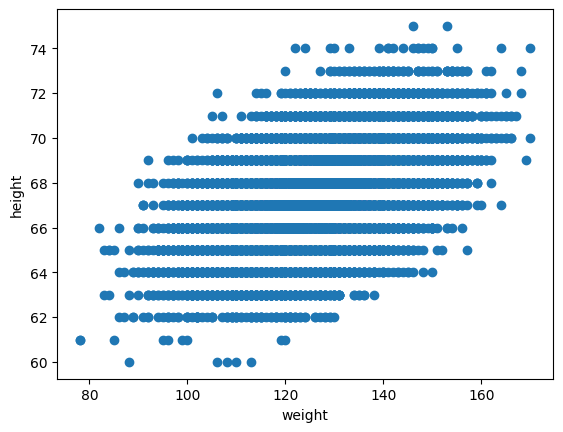

In [88]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  25000 non-null  int32
 1   weight  25000 non-null  int32
dtypes: int32(2)
memory usage: 195.4 KB


In [90]:
#slicing dataset to smaller part according to our need 
# df=df.iloc[0:250]

In [91]:
df.describe()

,height,weight
count,25000.000000,25000.000000
mean,67.493240,126.578320
std,1.923731,11.659936
min,60.000000,78.000000
25%,66.000000,119.000000
50%,67.000000,127.000000
75%,69.000000,134.000000
max,75.000000,170.000000


In [92]:
df.isnull().sum()

height    0
weight    0
dtype: int64

# divide into dependent and independent features 

In [93]:
X=df[['weight']]  #independent feature take it like 2d array having a column and multiple rows 
y=df['height']  #dependent feature  take it as simple datapoints


In [94]:
X.shape , y.shape

((25000, 1), (25000,))

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [97]:
X_train.shape ,X_test.shape

((20000, 1), (5000, 1))

In [98]:
y_train.shape ,y_test.shape

((20000,), (5000,))

# applying standard scaling 

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler=StandardScaler()

In [101]:
X_train=scaler.fit_transform(X_train)

In [102]:
X_test=scaler.transform(X_test)

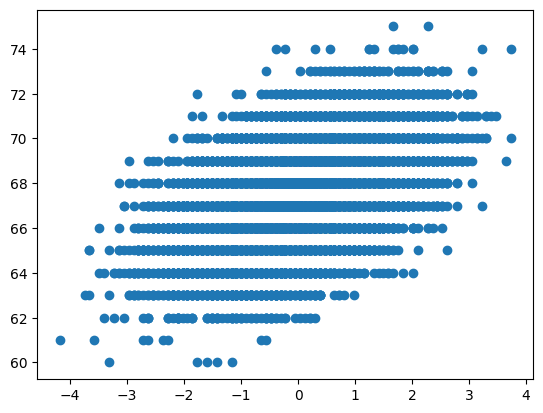

In [103]:
plt.scatter(X_train,y_train)

# building the model of linear regression 

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
regressor=LinearRegression()

In [106]:
#feeding the train data 
regressor.fit(X_train,y_train)

LinearRegression()

In [107]:
regressor.intercept_

67.49185

In [108]:
regressor.coef_

array([0.94978928])

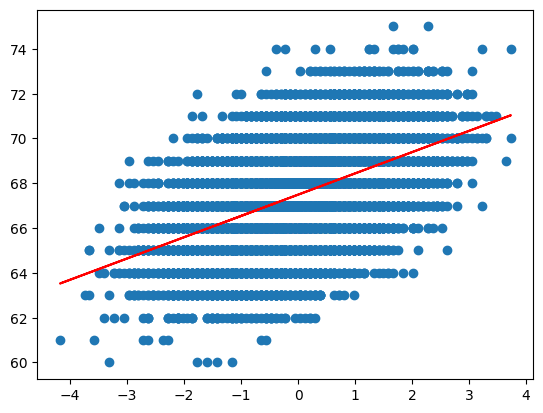

In [109]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [110]:
#prediction for test data
y_pred_test=regressor.predict(X_test)

In [111]:
y_pred_test

array([68.0980405 , 66.2198866 , 68.17969937, ..., 68.66965256,
       67.68974618, 68.0980405 ])

In [112]:
y_test

6868     68
24016    67
9668     67
13640    69
14018    69
         ..
8670     68
11839    67
4013     68
21147    67
695      70
Name: height, Length: 5000, dtype: int32

# performance metrix MAE,MSE,RMSE

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [114]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

2.7932149334414516
1.333950592498164
1.671291396926775


# checking the accuracy of the model that is R square and Adjusted R squared 

##  r square formula

            r2=1-ssr/sst
            r^2--->coefficient of determination 
            ssr--->sum of square of residuals 
            sst---->total sum of squares 

In [115]:
from sklearn.metrics import r2_score

In [116]:
score=r2_score(y_test,y_pred_test)
score

0.25893664422883256

# adjusted r2  formula 

        adj r2= 1-[(1-r2)*(n-1)/(n-k-1)]
        
    r2- is r2 calculated of the model 
    n--->no of observations
    k-->no of predictor variables 

In [117]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2587883722488863

In [118]:
scaler

StandardScaler()

In [119]:
regressor

LinearRegression()